In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm as anova
from statsmodels.stats.outliers_influence import variance_inflation_factor as variance_inflation_factor
from ISLP.models import (ModelSpec as Ms, summarize, poly)
from ISLP import load_data
import patsy

In [48]:
Boston = load_data("Boston")
Boston.shape[0]
type(Boston)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [49]:
a = np.array([2,3,4,5,6]).reshape(5,1)
b= np.array([2,3])
a[b]

array([[4],
       [5]])

a = np.array[(2,3,4,5,6)]
a[2,3]

In [50]:
# model fitting using smf.ols
data = pd.DataFrame({'medv': Boston['medv'],'lstat': Boston['lstat']})
model = smf.ols('medv ~ lstat ', data=data).fit()
model.summary()
print(model.params)
model.conf_int(0.9)

Intercept    34.553841
lstat        -0.950049
dtype: float64


,0,1
Intercept,34.483105,34.624577
lstat,-0.954919,-0.945180


In [51]:
# pred gives the location of the fitted line
Y_new=pd.DataFrame({'lstat': [5, 10, 15]})
pred =model.get_prediction(Y_new)
pred.summary_frame(alpha=0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.135794,30.471394,19.539005,40.068183
1,25.053347,0.294814,24.567529,25.539166,14.798989,35.307705
2,20.303101,0.290893,19.823743,20.782458,10.049047,30.557155


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_82561/2076837517.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax_plot, model.params[0], model.params[1])
/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_82561/2076837517.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axline((0,model.params[0]), slope=model.params [1], color='red', lw=2)


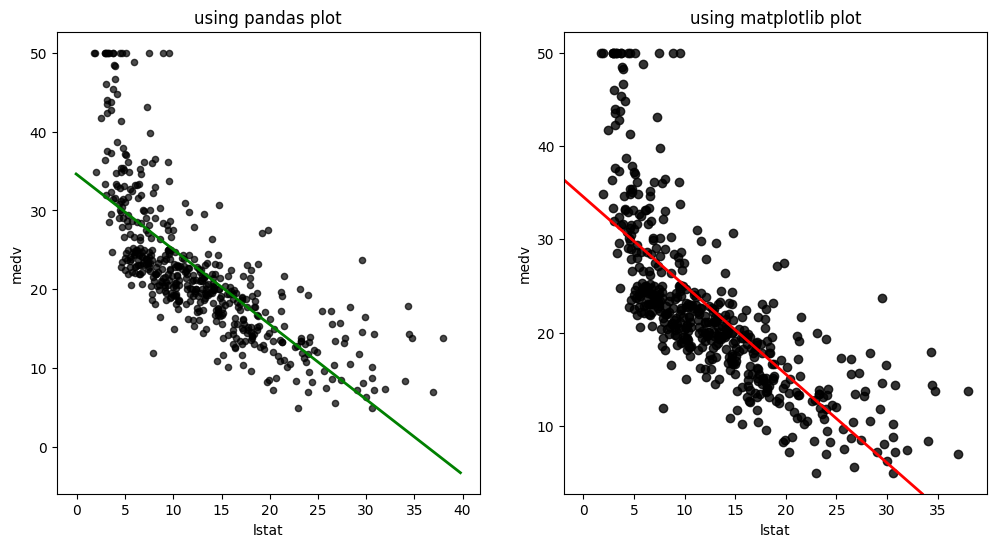

In [61]:
# adding line to the existing plot from scratch
# pandas expect column names as string not as Boston['lstat']
fig, ax = plt.subplots(1,2, figsize=(12, 6)) 
def abline(exist_plot , b0, b1):
    xlim= exist_plot.get_xlim()
    ylim = [b1 * xlim [0] + b0, b1 * xlim [1] + b0]
    exist_plot.plot(xlim , ylim, color='green', lw=2 )

# ax is argument in ax_plot  
ax_plot = Boston.plot.scatter('lstat', 'medv', color='black', alpha=0.7, ax=ax[0])
abline(ax_plot, model.params[0], model.params[1]) 
ax[0].set_ylabel('medv')
ax[0].set_xlabel('lstat')
ax[0].set_title('using pandas plot')


# axline expects the value of the value of the y at x=0 as first argument
ax[1].scatter(Boston['lstat'], Boston['medv'], color='black', alpha=0.8);
ax[1].axline((0,model.params[0]), slope=model.params [1], color='red', lw=2)
ax[1].set_ylabel('medv')
ax[1].set_xlabel('lstat')
ax[1].set_title('using matplotlib plot')
plt.show();


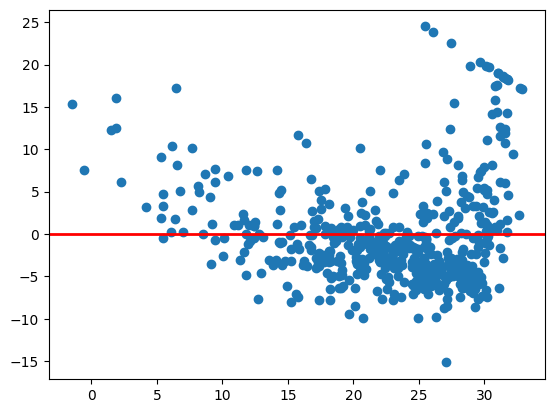

In [53]:
residual_plot = plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', lw=2)

[141 373 374 412 414]
(506,)


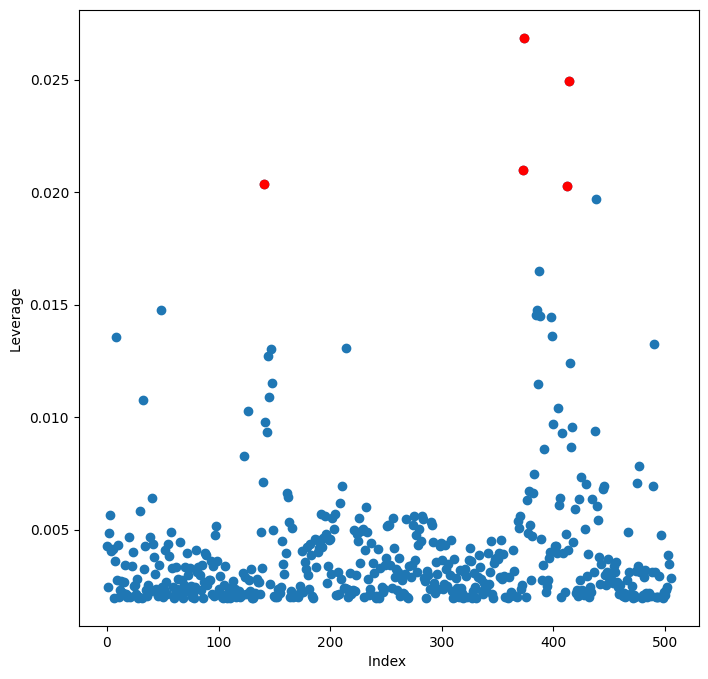

In [54]:
x=Boston['lstat']
infl = model. get_influence ()
ax = plt.subplots(figsize =(8 ,8))[1]
# plotting high leverage points
ax.scatter(np.arange(x.shape[0]) , infl.hat_matrix_diag )

high_leverage_point_index = np.where((infl. hat_matrix_diag > 0.02))[0]

# highlighting high leverage points
ax.scatter( high_leverage_point_index, infl.hat_matrix_diag[[high_leverage_point_index]]  , color='red')
ax. set_xlabel ('Index ')
ax. set_ylabel ('Leverage ')

# high leverage points fucntion
# interger like 506 has no lenghth , length is for ex 2 for array 2,3
y= np.arange(x.shape[0])
hat = infl.hat_matrix_diag
A=[]
def hat_i(y, hat):
     for i in range(len(y)):
      if hat[i] > 0.02:
        A.append(i)
     return A

hat_i(y, hat)   
# np.where returns a tuple so we need to extract the first element
high_leverage = np.where(hat > 0.02)[0]
print(high_leverage)
# highlighting the high leverage points

print(x.shape)

In [55]:
# multiple linear regression
x = Boston.columns.drop(['medv'])
formula = 'medv ~'+ '+'.join(x)
print(formula)

mm = smf.ols( 'medv ~ lstat - age-1' , data= Boston).fit()
print(mm.summary())

mm1 = smf.ols( 'medv ~ lstat-1' , data= Boston).fit()
print(mm1.summary())

mm2= smf.ols(formula+'-age' , data= Boston).fit()
print(mm2.summary())

mm.get_prediction().summary_frame(alpha=0.05)


medv ~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat
                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                    2.71e-67
Time:                        19:40:36   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|    

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.588079,0.275662,5.046493,6.129665,-29.950407,41.126565
1,10.256032,0.505934,9.262037,11.250027,-25.292227,45.804291
2,4.522080,0.223076,4.083808,4.960351,-31.014982,40.059141
3,3.298986,0.162740,2.979255,3.618718,-32.236811,38.834784
4,5.980815,0.295036,5.401166,6.560465,-29.558271,41.519902
...,...,...,...,...,...,...
501,10.850747,0.535272,9.799113,11.902381,-24.699170,46.400664
502,10.188706,0.502613,9.201235,11.176176,-25.359371,45.736783
503,6.328667,0.312196,5.715305,6.942030,-29.210985,41.868320
504,7.271235,0.358693,6.566520,7.975949,-28.270111,42.812581


In [ ]:
Boston.shape
Boston1 = Boston.drop('medv', axis=1)
print(type(Boston))
Boston.values
# variance inflation factor to know collinearity if >5 or 10 need to be removed
A=[]
for i in range(0,Boston1.shape[1]):
    A.append(variance_inflation_factor(Boston1.values, i))
print(A)    
df1= pd.DataFrame({'features': Boston1.columns,'VIF': A})
df1

<class 'pandas.core.frame.DataFrame'>
[2.0779440263553166, 2.842979690883528, 14.446693237434957, 1.1485278078677212, 73.07755810210544, 76.16043106786839, 21.350797264892297, 14.576651862220688, 14.732498330482695, 61.225415571348584, 78.72710022447247, 11.040785671419718]


,features,VIF
0,crim,2.077944
1,zn,2.842980
2,indus,14.446693
3,chas,1.148528
4,nox,73.077558
5,rm,76.160431
6,age,21.350797
7,dis,14.576652
8,rad,14.732498
9,tax,61.225416


In [57]:
mm3 = smf.ols('medv~ lstat+ age + lstat*age', data=Boston).fit()
print(mm3.summary())
mm4 = smf.ols('medv~ age + lstat +I(lstat**2)', data=Boston).fit()
print(mm4.summary())
mm5 = smf.ols('medv~ age + lstat', data=Boston).fit()
print(mm5.summary())
anova(mm5, mm4)


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           4.86e-88
Time:                        19:40:36   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


Text(0.5, 1.0, 'Residual plot')

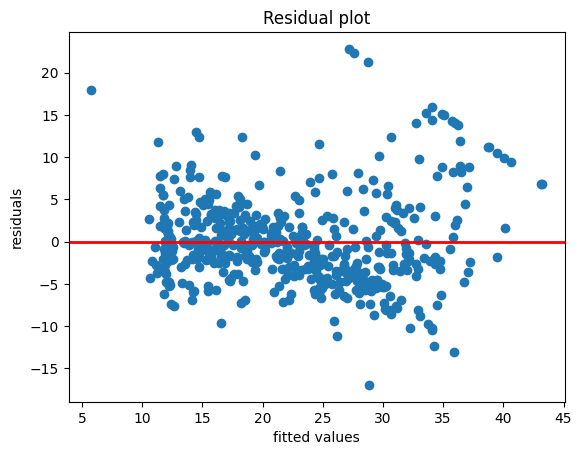

In [58]:
mm4
plt.scatter(mm4.fittedvalues, mm4.resid)
plt.axhline(0, color='red', lw=2)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('Residual plot')

model with degree 2 explains variability better than model with degree 1

In [59]:
Carseats = load_data("Carseats")
Carseats.dtypes
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [60]:
X = Carseats.columns.drop('Sales')
formula = 'Sales~'+'+'.join(X)
print(formula)
mm6 = smf.ols( formula , data=Carseats).fit()
mm6.params


Sales~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US


Intercept              5.660623
ShelveLoc[T.Good]      4.850183
ShelveLoc[T.Medium]    1.956715
Urban[T.Yes]           0.122886
US[T.Yes]             -0.184093
CompPrice              0.092815
Income                 0.015803
Advertising            0.123095
Population             0.000208
Price                 -0.095358
Age                   -0.046045
Education             -0.021102
dtype: float64